In [136]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [182]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Задание 1

## Крестики-нолики

In [73]:
with open('Tic_tac_toe.txt', 'r') as file:
    lines = file.readlines()
X = []
y = []

In [74]:
for line in lines:
    el = line.strip().split(',')
    features = el[:-1]
    label = el[-1]
    X.append(features)
    y.append(label)
encoder = OneHotEncoder()
X = np.array(X)
X = encoder.fit_transform(X)
y = np.array(y)

In [75]:
acc = []
test_coef = np.arange(0.05, 1.0, 0.05)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

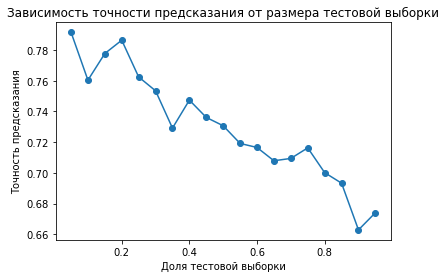

In [76]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Точность предсказания')

## e-mail спам

In [77]:
from sklearn.datasets import fetch_openml

In [105]:
data = fetch_openml(data_id=44)
X = data.data
y = data.target

In [106]:
acc = []
test_coef = np.arange(0.05, 1.0, 0.05)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

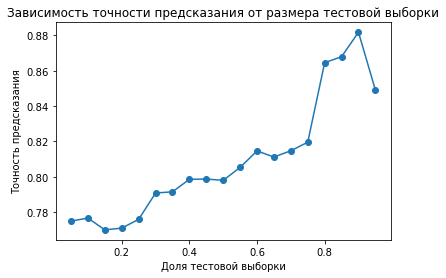

In [107]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Точность предсказания')

# Задание 2

Text(0.5, 1.0, 'График данных с двумя признаками')

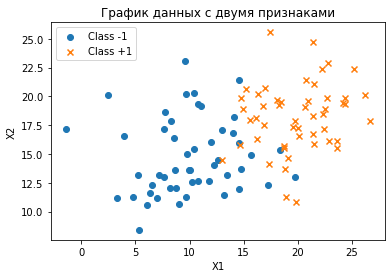

In [132]:
mean1 = [10, 14]
cov1 = 4

mean2 = [20, 18]
cov2 = 3

np.random.seed(5)
data1 = np.random.normal(mean1, cov1, size=[50, 2])
data2 = np.random.normal(mean2, cov2, size=[50, 2])

X = np.vstack((data1, data2))
y = np.concatenate((np.full(50, -1), np.full(50, 1)))

plt.scatter(data1[:, 0], data1[:, 1], label='Class -1', marker='o')
plt.scatter(data2[:, 0], data2[:, 1], label='Class +1', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('График данных с двумя признаками')

In [133]:
acc = []
test_coef = np.arange(0.05, 1.0, 0.05)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    mnb = GaussianNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

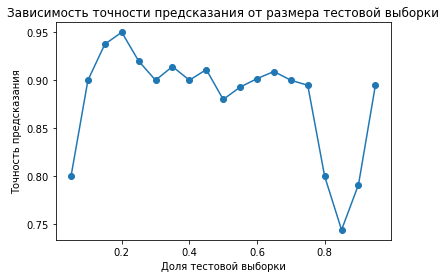

In [134]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Точность предсказания')

# Задание 3

In [138]:
import pandas as pd

In [197]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)
test.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)

In [207]:
label_encoders = {}
categorical_features = ["Sex", "Embarked"]
for feature in categorical_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.fit_transform(test[feature])
    label_encoders[feature] = le
y_train = train['Survived']
train = train.drop('Survived', axis=1)
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["Fare"].fillna(train["Fare"].mean(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [208]:
mnb = MultinomialNB()
mnb.fit(train, y_train)
y_pred = mnb.predict(test)

In [211]:
y_pred.sum()

116